In [3]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())


x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [2]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels

import numpy as np


np.int = np.int32
np.float = np.float64
np.bool = np.bool_

y_n = np.ravel(y)
X_n = X.values


from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy



rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_n, y_n)



# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	482
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	482
Iteration: 	16 / 100
Confirmed: 	16
Tenta

In [3]:
# check selected features - first 5 features are selected
feat_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [4]:
# check ranking of features
feat_selector.ranking_

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1, 238, 153, 481,
       177, 478, 265, 305, 459, 233, 395, 163,  31, 205, 403, 124, 167,
       147,  70, 304,  96, 137, 293, 208, 483,  67,  43, 183, 242, 126,
        33, 338, 393, 315, 299, 271, 252, 210, 102, 252, 260, 271, 442,
       331,  50, 291, 433, 377,  24, 337, 268,  31, 279, 451,  24,   4,
       473,  76,  49, 247, 392, 255, 262, 221,  42,  13,  36, 410, 251,
        79,  65, 122, 458, 360, 191,  86, 265,  92, 454, 218, 431, 267,
       485, 379, 454, 382, 386, 415, 195,  47, 322,   1,   1,   1,   1,
         1,   1,  73, 288,  39,  18, 444, 471,  98,  79, 439, 391, 354,
        81, 189,  46, 198,  85,  76, 215, 366, 215, 194, 113, 428,  11,
       408,  31, 151,   6, 184, 162, 322, 137, 288,  59, 461, 418, 377,
       285, 446, 237, 109, 298,  71, 368, 395, 116,  94, 206, 234,  17,
        99, 127, 309, 107, 230,  86, 376, 384, 325, 400, 384, 446, 474,
       328, 319, 257, 349, 419, 342,  62, 221, 247,  89, 437, 14

In [5]:
X_filtered

array([[-2.61977304, -2.61953328, -1.19935019, ..., -0.17704236,
        -0.12362088,  1.0493883 ],
       [-1.41557893, -1.78254367, -2.88027041, ...,  1.82386771,
         0.08375814, -1.19120577],
       [-2.74509151, -1.38294477, -1.62601519, ...,  0.7719379 ,
         1.25519023, -0.62657602],
       ...,
       [-0.41899368, -3.16423075, -1.05778919, ..., -0.92814675,
        -0.90078301,  0.47375643],
       [ 2.29101486,  1.07369718,  0.07184925, ...,  1.12964393,
         0.00589978,  1.02347513],
       [-0.50491196, -0.72755641, -0.33166452, ..., -0.03616697,
        -0.27233584, -1.71854854]])

In [10]:
from matplotlib import pyplot
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
fitres= model.fit(X, y)
# plot feature importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

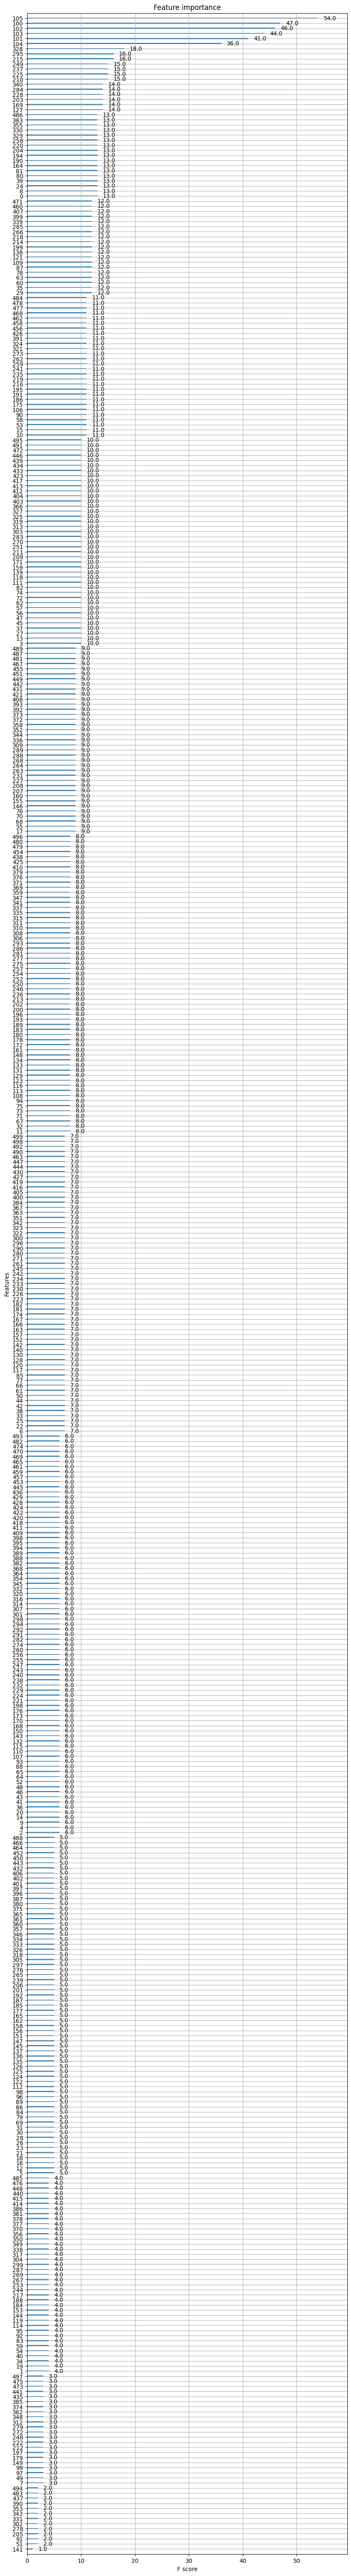

In [11]:


#pyplot.figure(figsize=(10, 6))
#plot_importance(model, height=0.5)

fig, ax = pyplot.subplots(figsize=(10, 80))
plot_importance(model, ax=ax)

In [23]:
import pandas as pd
df2=pd.DataFrame.from_dict(fitres.get_booster().get_fscore(), orient='index').sort_values(0, ascending=False)
df2
# df2.columns = [['idx', 'fscore']]
# df2.to_csv('feature_importance_xgb.csv', index=False)

,0
105,54.0
100,47.0
102,46.0
103,44.0
101,41.0
...,...
91,2.0
437,2.0
353,2.0
331,2.0


In [32]:
import pandas as pd

# Your dictionary
data = fitres.get_booster().get_fscore()
# Convert to DataFrame
df = pd.DataFrame(list(data.items()), columns=['idx', 'ranking'])

df['idx'] = df['idx'].astype(int)

# Sort by 'idx'
df = df.sort_values('ranking', ascending=False)

df.to_csv('feature_importance_xgb.csv', index=False)

print(df)

     idx  ranking
105  105     54.0
100  100     47.0
102  102     46.0
103  103     44.0
101  101     41.0
..   ...      ...
91    91      2.0
436  437      2.0
352  353      2.0
330  331      2.0
141  141      1.0

[499 rows x 2 columns]


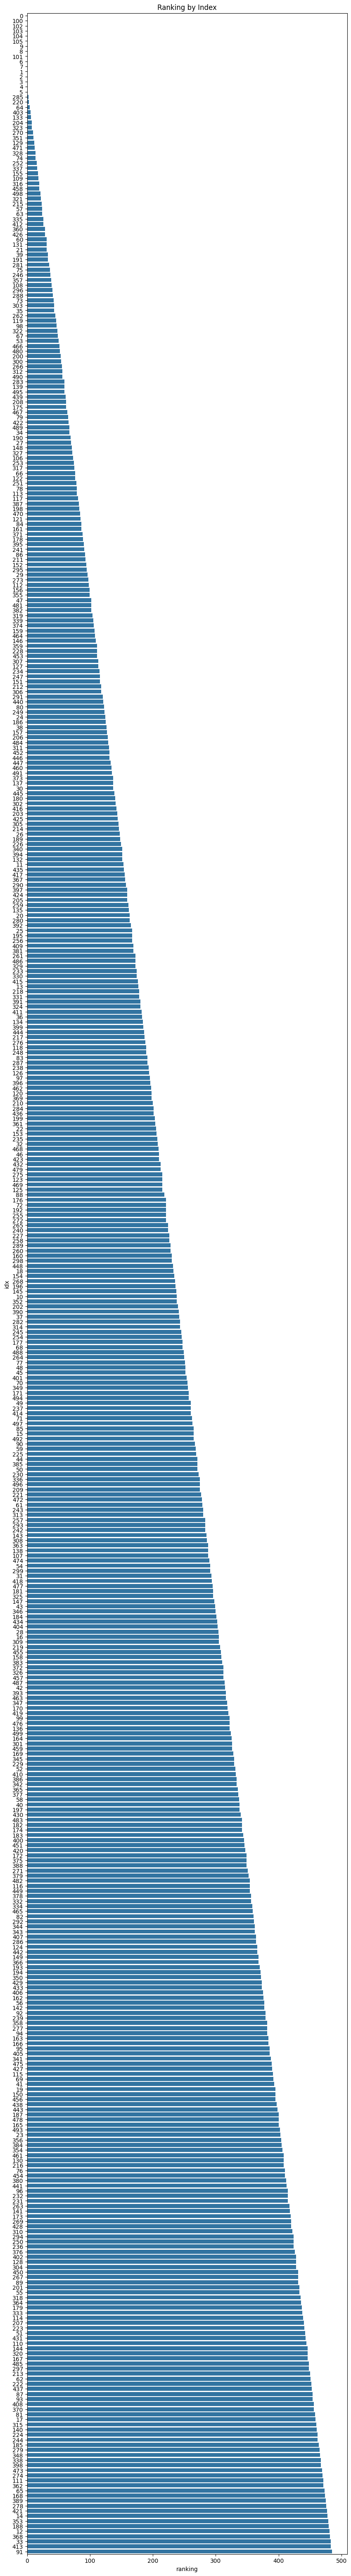

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# assuming feat_selector.ranking_ is your array
ranking = feat_selector.ranking_

# create an array of indices
indices = np.arange(len(ranking))

# Create DataFrame
df = pd.DataFrame({
    'idx': indices,
    'ranking': ranking
})

# Sort DataFrame by ranking in ascending order
df_sorted = df.sort_values('ranking')

# Plot horizontal bar chart with ordered 'idx'
plt.figure(figsize=(10, 80))
sns.barplot(x='ranking', y='idx', data=df, order=df_sorted['idx'], orient='h')
plt.title('Ranking by Index')
plt.show()

In [ ]:
df_sorted.to_csv('df_sorted_boruta.csv', index=False)

In [33]:
correlation_matrix = X.corr()
print(correlation_matrix)

X.to_csv('matrix.csv', index=False, header=False, sep=' ')

          0         1         2         3         4         5         6    \
0    1.000000  0.855214  0.763482  0.737945  0.816319  0.762123  0.960614   
1    0.855214  1.000000  0.768780  0.806615  0.756509  0.844912  0.893801   
2    0.763482  0.768780  1.000000  0.633101  0.663178  0.618630  0.808297   
3    0.737945  0.806615  0.633101  1.000000  0.649072  0.768813  0.715958   
4    0.816319  0.756509  0.663178  0.649072  1.000000  0.796810  0.740988   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.006389  0.002653  0.012775 -0.013809  0.003647  0.001092  0.011290   
496  0.008428  0.005548 -0.004580  0.015528  0.022998  0.009926  0.002830   
497  0.002900 -0.009082  0.000090  0.001012 -0.002112  0.000422  0.001219   
498 -0.016893 -0.018942 -0.012080 -0.006774 -0.007740 -0.012865 -0.026744   
499  0.000684 -0.006228 -0.002460 -0.011544  0.014969  0.005040 -0.004737   

          7         8         9    ...       490       491       492  \
0  

In [1]:
idcs=[0,1, 100,102,103,104,105,9,8,101,6,7,2,3,4,5]
idcs2=[0, 100,102,103,104,105,101]

In [4]:
correlation_matrix = X.iloc[:, idcs].corr()
print(correlation_matrix)

          0         1         100       102       103       104       105  \
0    1.000000  0.855214  0.507561  0.301602  0.325209  0.152490  0.230559   
1    0.855214  1.000000  0.144264  0.180826  0.349798  0.277608  0.256854   
100  0.507561  0.144264  1.000000  0.000748  0.005656 -0.001539  0.010834   
102  0.301602  0.180826  0.000748  1.000000 -0.003460 -0.018184  0.008898   
103  0.325209  0.349798  0.005656 -0.003460  1.000000  0.002726 -0.017504   
104  0.152490  0.277608 -0.001539 -0.018184  0.002726  1.000000  0.007204   
105  0.230559  0.256854  0.010834  0.008898 -0.017504  0.007204  1.000000   
9    0.725570  0.929867  0.016996  0.133542  0.488265  0.056968  0.276666   
8    0.781735  0.872421  0.317230  0.254492  0.395386  0.240702  0.299177   
101  0.164571  0.309683  0.005355  0.015755 -0.003643  0.006624  0.024145   
6    0.960614  0.893801  0.441258  0.255023  0.349153  0.191672  0.275423   
7    0.812805  0.829427  0.162614  0.436518  0.488801  0.139660  0.227070   

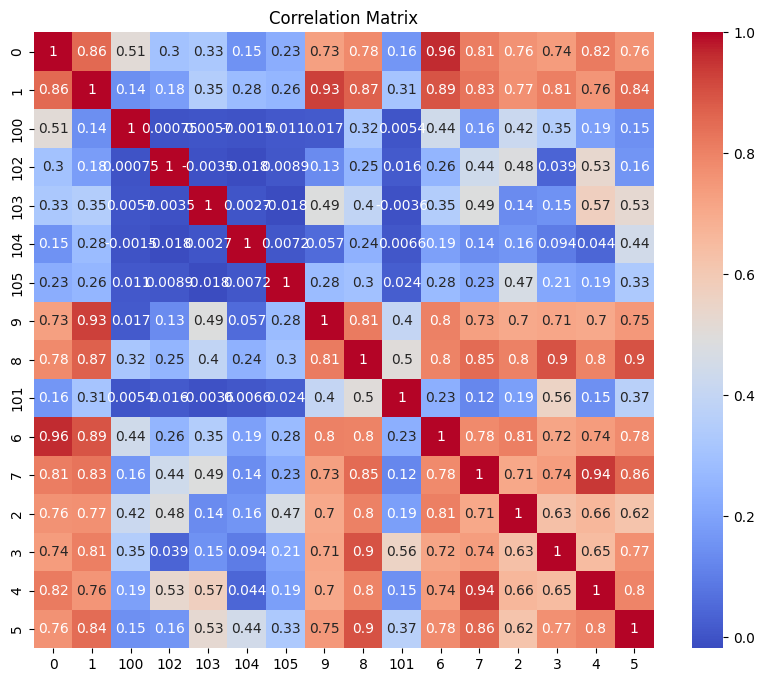

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
correlation_matrix = X.iloc[:, idcs2].corr()
print(correlation_matrix)

          0         100       102       103       104       105       101
0    1.000000  0.507561  0.301602  0.325209  0.152490  0.230559  0.164571
100  0.507561  1.000000  0.000748  0.005656 -0.001539  0.010834  0.005355
102  0.301602  0.000748  1.000000 -0.003460 -0.018184  0.008898  0.015755
103  0.325209  0.005656 -0.003460  1.000000  0.002726 -0.017504 -0.003643
104  0.152490 -0.001539 -0.018184  0.002726  1.000000  0.007204  0.006624
105  0.230559  0.010834  0.008898 -0.017504  0.007204  1.000000  0.024145
101  0.164571  0.005355  0.015755 -0.003643  0.006624  0.024145  1.000000


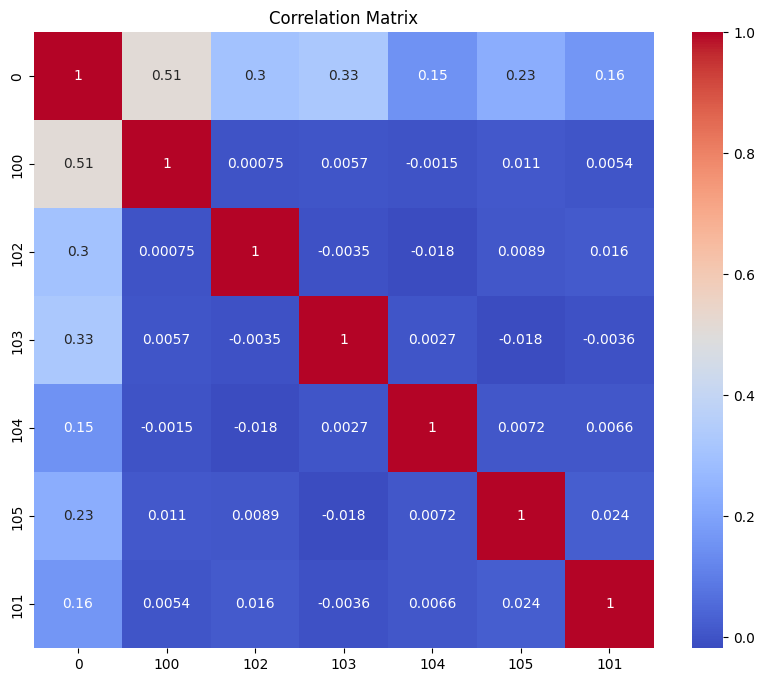

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()